<a href="https://colab.research.google.com/github/siddley1001/CodeCademy-Capstone-Project/blob/master/Dating_Capstone_Project_%5BEssay_Question_Analysis%5D_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import spacy

from datetime import datetime
from sortedcontainers import SortedDict
from progressbar import ProgressBar

import re

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Purpose: Formulate Machine Learning Questions
1.  **Predict Gender** of a respondent based on features
2. **Predict Age** based on features
    - Helps ask certain questions users are more likely to answer based on age

In [3]:
#Make a copy of the dataset so we have all the original information as we manipulate columns and values
PATH = '/content/drive/My Drive/Dating Capstone Project/'
df = pd.read_csv(PATH + 'data/profiles.csv')
df_copy = df.copy()

## Helper Functions

In [4]:
def map_colors(df, keyword):
    '''Creates a color dictionary based on keyword in dataframe features'''
    color_map = {}
    
    for feature in df.columns:
        if keyword in feature:
            color_map[feature] = '#62eb96' #emerald green for essay colors
        else:
            color_map[feature] = '#eb62b7' #pink otherwise
    return color_map

def draw_missing_data_table(df):
    ''' Returns a table of % missing from each feature column in the input dataframe'''
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/ df.isnull().count()).sort_values(ascending = False)
    missing_data = pd.concat([total, percent], axis = 1, keys = ['Total','Percent Missing'])
    final_missing = missing_data.reset_index().rename(columns = 
                                                      {'index': 'feature', 
                                                       'Total': 'total null', 
                                                       'Percent Missing': '% of null values in the column'})
    return final_missing

In [5]:
p_bar = ProgressBar()

br_regex = '<br />'
next_line_regex = '\\n'

def re_replace(df, essay, expression):
    response_len = range(len(self.df[self.essay]))

    for index in response_len:
        if pd.isnull(self.df.loc[index, self.essay]):
            self.df.loc[index, essay] = 'Did not respond'
        else:
            self.df.loc[index, self.essay].replace(expression, ' ')


# class Text:
#     def __init__(self, df, essay):
#         self.set_dfessay(df, essay)

#     def set_dfessay(self, df, essay):
#         self.df = df
#         self.essay = essay

#     def re_replace(self, expression):
#         response_len = range(len(self.df[self.essay]))

#         for index in response_len:
#             if pd.isnull(self.df.loc[index, self.essay]):
#                 self.df.loc[index, essay] = 'Did not respond'
#             else:
#                 self.df.loc[index, self.essay].replace(expression, ' ')

#         self.set_dfessay(self.df, self.essay)

    def ner_search(self):
        dictionary = {}
        for index in p_bar(range(len(self.df[self.essay]))):
            doc = nlp(self.df.loc[index, self.essay])
            ent_list = [ent.label_ for ent in doc.ents]
            dictionary[index] = ent_list
        return dictionary

In [6]:
def countFreq(list):
    freq_dic = {}
    for hour in list:
        freq_dic[hour] = list.count(hour)
    return(freq_dic)

## Load data from CSV

## Simplify Status Feature

In [7]:
df_copy.status.value_counts()

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64

**Summary**: To be expected, a majority of the status values are "single"
- Curious to see why someone would self-label as **'seeing someone' or 'married'** while on OKCupid

In [8]:
simplify_status = {'single': 1,
                   'seeing someone': 0,
                   'available': 1,
                   'married': 0,
                   'unknown': 1}
df_copy['status'] = df_copy['status'].map(simplify_status).astype(bool)

In [9]:
df_copy.status.value_counts()

True     57572
False     2374
Name: status, dtype: int64

### Create seperate dataframes for essay and non-essay columns

In [10]:
essay_cols = [str(x) for x in df_copy.columns if 'essay' in x]
nonessay_cols = [str(x) for x in df_copy.columns if 'essay' not in x]

In [11]:
essay_df = df_copy[essay_cols]
nonessay_df = df_copy[nonessay_cols]

In [12]:
total_respondants = df_copy.shape[0]

**Summary**: Almost 60,000 observations!

In [13]:
df_copy.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,True
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",True
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",True
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",True
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,True


#Essay Question Exploration

## Question Summary:
- essay0 - My self summary
- essay1 - What I’m doing with my life
- essay2 - I’m really good at
- essay3 - The first thing people usually notice about me
- essay4 - Favorite books, movies, show, music, and food
- essay5 - The six things I could never do without
- essay6 - I spend a lot of time thinking about
- essay7 - On a typical Friday night I am
- essay8 - The most private thing I am willing to admit
- essay9 - You should message me if…


## Missing Essay Responses

In [14]:
essay_missing = draw_missing_data_table(df_copy[essay_cols])
essay_missing #sorted by %missing of each essay feature

,feature,total null,% of null values in the column
0,essay8,19225,0.320705
1,essay6,13771,0.229723
2,essay9,12603,0.210239
3,essay7,12451,0.207704
4,essay3,11476,0.191439
5,essay5,10850,0.180996
6,essay4,10537,0.175775
7,essay2,9638,0.160778
8,essay1,7572,0.126314
9,essay0,5488,0.091549


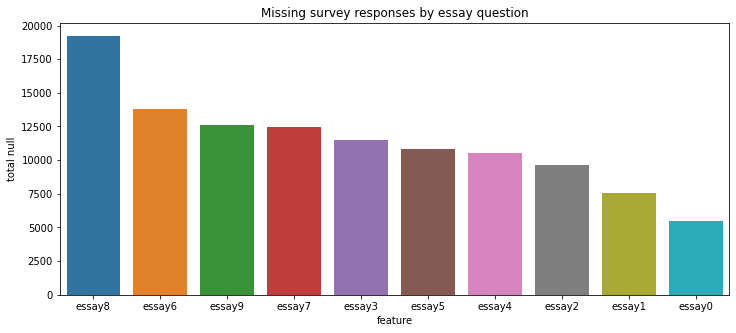

In [15]:
plt.figure(figsize = (12,5))
plt.title('Missing survey responses by essay question')
sns.barplot(x = 'feature', y = 'total null', data = essay_missing)

# Definitions and thoughts -- in an accompanied Google Sheets
- body_type:
- diet:
- drinks:
- drugs:
- education:

- ethnicity:
- height:
- income:
- job:
- offspring:
- orientation:
- pets:
- religion:
- sex:
- sign:
- smokes:
- speaks:
- status:


# Understand Missing Data by Feature

In [16]:
missing_features = draw_missing_data_table(df_copy)
missing_features

,feature,total null,% of null values in the column
0,offspring,35561,0.593217
1,diet,24395,0.406950
2,religion,20226,0.337404
3,pets,19921,0.332316
4,essay8,19225,0.320705
5,drugs,14080,0.234878
6,essay6,13771,0.229723
7,essay9,12603,0.210239
8,essay7,12451,0.207704
9,essay3,11476,0.191439


### Visualization of *missing data* by feature

In [17]:
essay_color_map = map_colors(df_copy, 'essay')

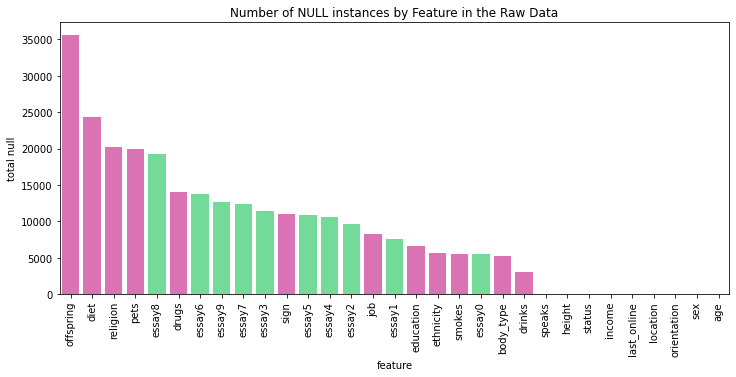

In [18]:
plt.figure(figsize = (12,5))
plt.title('Number of NULL instances by Feature in the Raw Data')
plt.xticks(rotation = 90)
sns.barplot(x = 'feature', y = 'total null', data = missing_features, palette= essay_color_map)

## Numerical Features

### Correlation Matrix
Age, Height, Income

Text(0.5, 1.0, 'Correlation of Numerical Features')

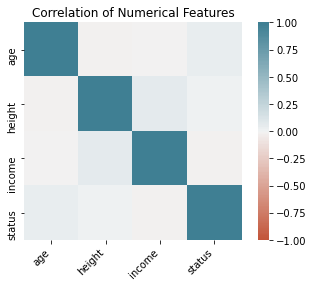

In [19]:
corr = df_copy.corr()
ax = sns.heatmap(corr, vmin = -1, vmax= 1, center = 0, cmap = sns.diverging_palette(20,220, n=200), square = True)
ax.set_xticklabels(
    ax.get_xticklabels(), rotation= 45, horizontalalignment = 'right'
)
plt.title('Correlation of Numerical Features')

**Summary**: We can see that there is a *faint* correlation (~.25) between **height** and **income**

### Age

In [20]:
df.age.describe()

count    59946.000000
mean        32.340290
std          9.452779
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        110.000000
Name: age, dtype: float64

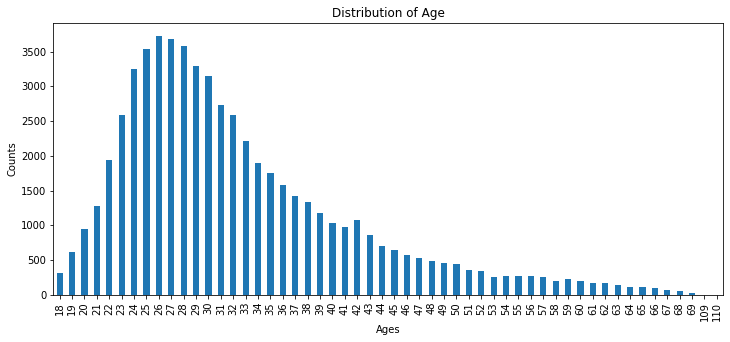

In [21]:
plt.figure(figsize = (12,5))
plt.title('Distribution of Age')
plt.xlabel('Ages')
plt.ylabel('Counts')
df.age.value_counts().sort_index().plot(kind = 'bar')

**Summary**: Distribution of Ages is *right-skewed* where there are **2 outliers** of ages 109 and 110.

In [22]:
df_copy[df_copy['age'] > 69]

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
2512,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,-1,NaN,2012-06-27-22-16,"daly city, california",NaN,straight,NaN,NaN,f,NaN,NaN,english,True
25324,109,athletic,mostly other,NaN,never,working on masters program,NaN,NaN,NaN,nothing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,-1,student,2012-06-30-18-18,"san francisco, california",might want kids,straight,NaN,other and somewhat serious about it,m,aquarius but it doesn&rsquo;t matter,when drinking,english (okay),True


In [23]:
print('Age outliers had one scarcely reported height (f) and 1 (m) student that also incorrectly explained his height')

Age outliers had one scarcely reported height (f) and 1 (m) student that also incorrectly explained his height


Impute Age with the Median

In [24]:
# df_copy[df_copy['age'] > 69] = df_copy.age.median()
median_age = df_copy['age'].median()

#Set outliers to the median age to AVOID dropping
df_copy.loc[df_copy['age'] > 69, 'age'] = median_age

### Height

In [25]:
df.height.describe()

count    59943.000000
mean        68.295281
std          3.994803
min          1.000000
25%         66.000000
50%         68.000000
75%         71.000000
max         95.000000
Name: height, dtype: float64

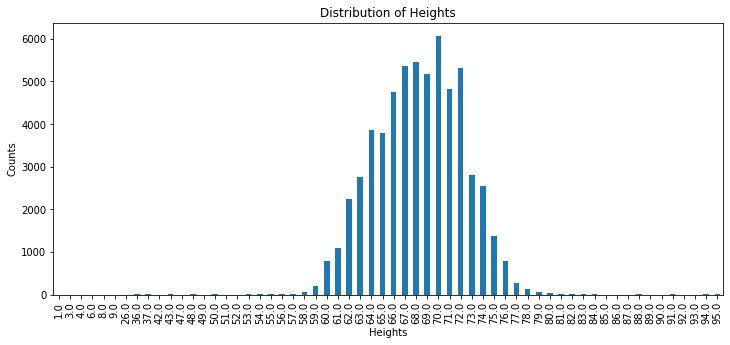

In [26]:
plt.figure(figsize = (12,5))
plt.title('Distribution of Heights')
plt.xlabel('Heights')
plt.ylabel('Counts')
df.height.value_counts().sort_index().plot(kind = 'bar')

In [27]:
len(df_copy[df_copy.height < 60])

335

**Summary**: Heights have a relatively normal distribution centered around 5'8"(68in).
- Upper Outliers (Top 99% Percentile): >6'3"ft (75in)
- Lower Outliers (bottom 1%) : <4'8"ft (56in)
    - Adjusted Dwarf height: <4' or (48in)

In [28]:
df_copy[pd.isnull(df_copy.height)] #subset of na heights

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
36428,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"thomas bernhard, foucault, annie hall, taxi dr...",NaN,consciousness,NaN,i passionately hate liars!,you know what my user name means and if you ar...,other,NaN,-1,artistic / musical / writer,2012-06-30-20-41,"berkeley, california",NaN,straight,NaN,NaN,f,NaN,NaN,"english (fluently), german (fluently)",True
54002,25,NaN,NaN,NaN,never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hispanic / latin,NaN,-1,NaN,2012-06-30-18-41,"guadalajara, mexico",NaN,straight,NaN,NaN,m,aries,NaN,english,True
58983,49,NaN,NaN,NaN,NaN,NaN,"great guy, lots of positive attributes*, but s...",living it.<br />\n<br />\nquite a bit more tha...,"lots, notably good, deep, excellent communicat...","some positive stuff, but i'll hold my tongue o...",lots.<br />\n<br />\nnot especially up to list...,"1. damn good friend, or better<br />\n2. manag...",many things. maybe too much.<br />\nnot really...,"at the moment, i'd rather not even say or thin...",i have a blog of much that's personal and priv...,you've good reason to think we'd like make at ...,NaN,NaN,-1,NaN,2012-07-01-08-35,"berkeley, california",doesn&rsquo;t have kids,straight,likes cats,NaN,m,NaN,no,english (fluently),True


In [29]:
df_copy['height'].isna().sum()

3

In [30]:
median_height = df_copy['height'].median()

#Update outliers with Median
df_copy.loc[df_copy['height'] < 48, 'height'] = median_height
df_copy.loc[df_copy['height'] > 84, 'height'] = median_height

#Update Nulls with Median
df_copy['height'].fillna(median_height)

0        75.0
1        70.0
2        68.0
3        71.0
4        66.0
         ... 
59941    62.0
59942    72.0
59943    71.0
59944    73.0
59945    68.0
Name: height, Length: 59946, dtype: float64

### Income

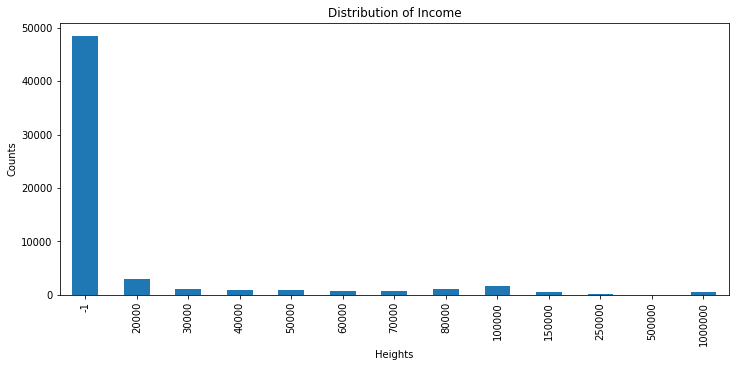

In [31]:
plt.figure(figsize = (12,5))
plt.title('Distribution of Income')
plt.xlabel('Heights')
plt.ylabel('Counts')
df.income.value_counts().sort_index().plot(kind = 'bar')

In [32]:
i = df_copy.income
unreported = 100* (i.value_counts().sum() - i[i==-1].count()) / i.value_counts().sum()
print("Only {x:.2f}% of data NOT EQUAL to -1 & avaiable, one should DROP the feature.".format(x = unreported))

Only 19.19% of data NOT EQUAL to -1 & avaiable, one should DROP the feature.


**Summary**: Overwhelming amount of unreported incomes as (-1) --> DROP

Instead FEATURE GENERATION: Create a boolean, "unreported income" feature to feed into the model

In [33]:
df_copy['reported_income'] = df_copy['income'].apply(lambda inc: 0 if inc == -1 else 1).astype(bool)
del df_copy['income']

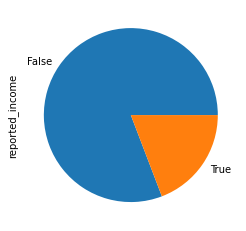

In [34]:
df_copy['reported_income'].value_counts().plot(kind = 'pie')

In [35]:
df_copy.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'job', 'last_online',
       'location', 'offspring', 'orientation', 'pets', 'religion', 'sex',
       'sign', 'smokes', 'speaks', 'status', 'reported_income'],
      dtype='object')

## Categorical Features

In [36]:
feats_to_explore = df_copy.columns.tolist()
feats_to_explore.pop(0)
feats_to_explore.pop(16)
feats_to_explore.pop(-1)
feats_to_explore.pop(-1)
feats_to_explore
# feats_to_explore.remove(['age', 'height', 'income', 'unreported_income'])

['body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks']

### Male (repl sex)

In [37]:
df_copy['is_male'] = df_copy['sex'].apply(lambda sex: 1 if sex== 'm' else 0).astype(bool)
del df_copy['sex']
feats_to_explore.pop(-4)

'sex'

### Orientation
OHE

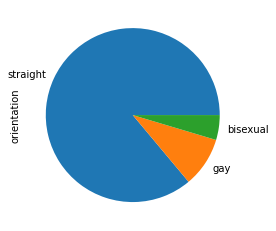

In [38]:
df_copy['orientation'].value_counts().plot(kind = 'pie')

In [39]:
df_copy = pd.concat([df_copy, pd.get_dummies(df_copy['orientation'], drop_first= True).astype(bool)], axis =1)

In [40]:
feats_to_explore.pop(-6)

'orientation'

### *Location

In [41]:
location_table = df_copy.location.str.split(pat = ', ', expand = True)
location_table.drop(2, axis =1, inplace=True)
location_table.columns = ['City', "State"]
location_table

,City,State
0,south san francisco,california
1,oakland,california
2,san francisco,california
3,berkeley,california
4,san francisco,california
...,...,...
59941,oakland,california
59942,san francisco,california
59943,south san francisco,california
59944,san francisco,california


States

In [42]:
outsider_state_mask = location_table['State'] != 'california'
outsiders = len(location_table[outsider_state_mask])
state_total = len(location_table['State'])
print(outsiders/state_total)

0.0015180328962733126


**Summary**: Notice *overwhelming majority* of survey respondents are from **California**
- **Note**: There are locations *outside of the United States*: i.e. **"germany", "british columbia", "ireland", "vietnam"**
- DROP Locations where states are outside of California
- Reduce the variety of locations by 134 to remove 0.5% of Responses

In [43]:
#get indices of rows where State != Cali
nonca_indices = [index for index, state in zip(range(len(location_table.State)), location_table.State) if state != 'california']

In [44]:
#concat the city column to the copy_df
df_copy = pd.concat([df_copy, location_table], axis =1)

df_copy.drop(nonca_indices, axis=0, inplace = True)
df_copy.drop('State', axis=1, inplace = True)
df_copy.drop('location', axis = 1, inplace = True)

Cities

In [45]:
print("Will have to concat the OHE of cities before feeding into the model, which creates {} new columns".format(df_copy['City'].nunique()))

Will have to concat the OHE of cities before feeding into the model, which creates 135 new columns


In [46]:
feats_to_explore.pop(-7)

'location'

### Last Online
+ 2011 - 2012
+ End of June to Beginning of July (~Essentially JULY2011 - July2012)

In [47]:
df_copy['last_online'] = df_copy['last_online'].astype('string') # Change dtype to a string to convert into Datetime
df_copy['last_online'] = pd.to_datetime(df['last_online'], format = "%Y-%m-%d-%H-%M")

In [48]:
dt_table = pd.DataFrame()
dt_table['Date'] = df_copy['last_online'].dt.date
dt_table['Time'] = df_copy['last_online'].dt.time
sorted = dt_table.sort_values(by = 'Date')
sorted

,Date,Time
57082,2011-06-27,09:35:00
22537,2011-06-27,22:47:00
40423,2011-06-27,10:36:00
10864,2011-06-27,23:57:00
1162,2011-06-27,16:17:00
...,...,...
55568,2012-07-01,04:09:00
46350,2012-07-01,02:13:00
55577,2012-07-01,01:27:00
55591,2012-07-01,07:14:00


#### Most Frequent Log-In times
- Dates
    - Growth Stage
    - Weekdays
- Times
    - Which **Hour** of the Day is most popular: 
        - Morning
        - Afternoon
        - Evening
- Create 2 new features
    - OHE day of the week
    - OHE bins of morning, midday, evening

##### Dates

In [49]:
dates = dt_table.Date #Extract Dates
(unq_date, date_count) = np.unique(dates, return_counts = True) #Get number of logins per unique date
unique_dates = np.asarray((unq_date, date_count)).T
dt = pd.DataFrame(unique_dates, columns = ['Dates', 'Frequency'])

Text(0.5, 1.0, 'Last-Online Frequency by Date')

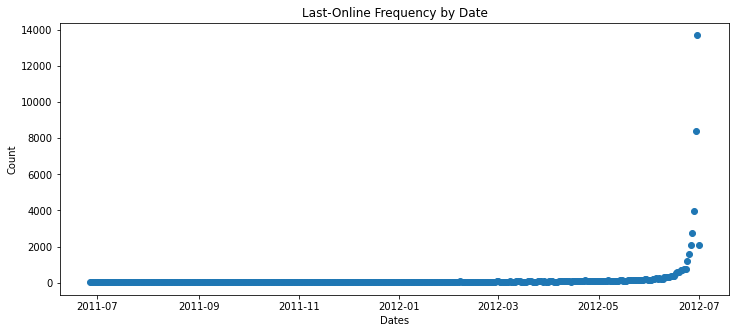

In [50]:
dt_order = dt.sort_values(by = 'Dates', ascending = True) #Dates from past to most recent

plt.figure(figsize= (12,5))
plt.plot_date(x = dt_order['Dates'], y = dt_order['Frequency'])
plt.xlabel('Dates')
plt.ylabel('Count')
plt.title("Last-Online Frequency by Date")

Explore the Growth stage of the dates

Text(0.5, 1.0, 'Last-Online Frequency by Date')

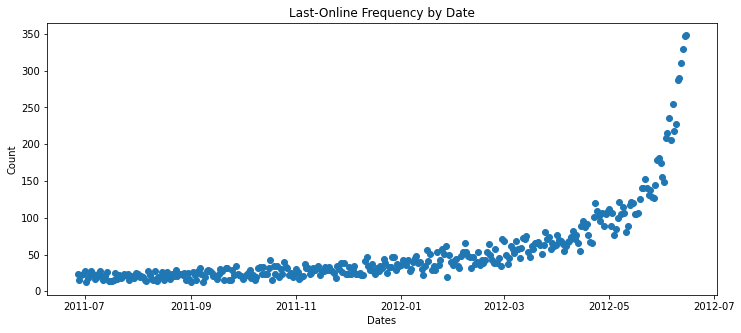

In [51]:
low_freq_dt = dt_order[0:355]
low_freq_dt

plt.figure(figsize= (12,5))
plt.plot_date(x = low_freq_dt['Dates'], y = low_freq_dt['Frequency'])
plt.xlabel('Dates')
plt.ylabel('Count')
plt.title("Last-Online Frequency by Date")

In [52]:
weekday_table = pd.to_datetime(dt_table.Date).dt.dayofweek.value_counts().to_frame().sort_index().T
weekday_table.columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_table.rename(index= {'Date': 'Last-Online'}, inplace= True)
weekday_table

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Last-Online,5058,5624,6279,7499,11843,17010,6542


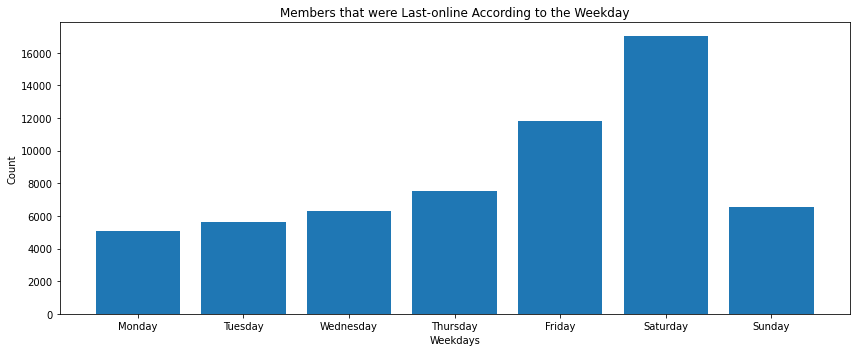

In [53]:
plt.figure(figsize= (12,5))
plt.bar(weekday_table.columns, weekday_table.values[0])
plt.title("Members that were Last-online According to the Weekday")
plt.xlabel('Weekdays')
plt.ylabel('Count')
plt.tight_layout()

##### Hours or Time of Day

In [54]:
dt_table

,Date,Time
0,2012-06-28,20:30:00
1,2012-06-29,21:41:00
2,2012-06-27,09:10:00
3,2012-06-28,14:22:00
4,2012-06-27,21:26:00
...,...,...
59941,2012-06-12,21:47:00
59942,2012-06-29,11:01:00
59943,2012-06-27,23:37:00
59944,2012-06-23,13:01:00


In [55]:
hours = [x.hour for x in dt_table.Time]
c = countFreq(hours)
sort_hours = SortedDict(c)

In [56]:
sort_hours

SortedDict({0: 3323, 1: 2218, 2: 1406, 3: 785, 4: 521, 5: 550, 6: 824, 7: 1459, 8: 2151, 9: 2479, 10: 2561, 11: 2523, 12: 2453, 13: 2456, 14: 2581, 15: 2685, 16: 2646, 17: 2918, 18: 3076, 19: 3363, 20: 3690, 21: 4263, 22: 4678, 23: 4246})

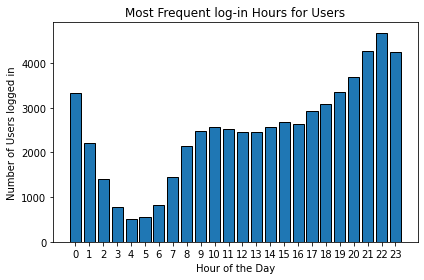

In [57]:
x = list(sort_hours.keys())
y = list(sort_hours.values())
plt.bar(x = x, height = y, edgecolor = "black", tick_label = x)

plt.title("Most Frequent log-in Hours for Users")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Users logged in")
plt.tight_layout()

In [58]:
#not including the 'evening' column to mimic the drop_first option in pd.get_dummies
df_copy['morning'] = df_copy['last_online'].apply(lambda date: True if date.hour < 8 else False)
df_copy['midday'] = df_copy['last_online'].apply(lambda date: True if date.hour >= 8 and date.hour < 16 else False)

In [59]:
feats_to_explore.pop(-7)
df_copy.drop('last_online', axis=1, inplace= True)

In [60]:
df_copy.head(3)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,job,offspring,orientation,pets,religion,sign,smokes,speaks,status,reported_income,is_male,gay,straight,City,morning,midday
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,transportation,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,True,False,True,False,True,south san francisco,False,False
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",True,True,True,False,True,oakland,False,False
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,NaN,NaN,straight,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++",True,False,True,False,True,san francisco,False,True


In [61]:
missing_features = draw_missing_data_table(df_copy[feats_to_explore])
missing_features

,feature,total null,% of null values in the column
0,offspring,35511,0.593284
1,diet,24360,0.406984
2,religion,20192,0.337349
3,pets,19888,0.332270
4,essay8,19202,0.320809
5,drugs,14057,0.234851
6,essay6,13757,0.229839
7,essay9,12591,0.210358
8,essay7,12433,0.207719
9,essay3,11463,0.191513


### Speaks

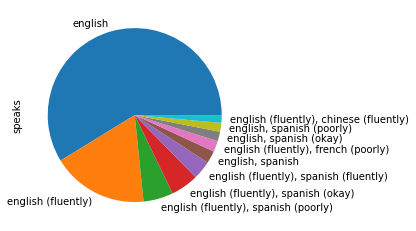

In [62]:
df_copy['speaks'].value_counts().head(10).plot(kind = 'pie')

In [63]:
lang_table= df_copy['speaks'].str.split(', ', expand = True)
lang_table['total known langs'] = lang_table.apply(lambda x: 5 - sum(x.isnull().values), axis =1)

lang_table

,0,1,2,3,4,total known langs
0,english,None,None,None,None,1
1,english (fluently),spanish (poorly),french (poorly),None,None,3
2,english,french,c++,None,None,3
3,english,german (poorly),None,None,None,2
4,english,None,None,None,None,1
...,...,...,...,...,...,...
59941,english,None,None,None,None,1
59942,english (fluently),None,None,None,None,1
59943,english (fluently),None,None,None,None,1
59944,english (fluently),spanish (poorly),chinese (poorly),korean (poorly),japanese (poorly),5


In [64]:
df_copy = pd.concat([df_copy, lang_table['total known langs']], axis =1)
df_copy.drop('speaks', axis = 1, inplace= True)
df_copy.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,job,offspring,orientation,pets,religion,sign,smokes,status,reported_income,is_male,gay,straight,City,morning,midday,total known langs
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,transportation,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,True,False,True,False,True,south san francisco,False,False,1
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,True,True,True,False,True,oakland,False,False,3
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,NaN,NaN,straight,has cats,NaN,pisces but it doesn&rsquo;t matter,no,True,False,True,False,True,san francisco,False,True,3
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,student,doesn&rsquo;t want kids,straight,likes cats,NaN,pisces,no,True,True,True,False,True,berkeley,False,True,2
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,artistic / musical / writer,NaN,straight,likes dogs and likes cats,NaN,aquarius,no,True,False,True,False,True,san francisco,False,False,1


In [65]:
feats_to_explore.pop(-1)
draw_missing_data_table(df_copy[feats_to_explore])

,feature,total null,% of null values in the column
0,offspring,35511,0.593284
1,diet,24360,0.406984
2,religion,20192,0.337349
3,pets,19888,0.332270
4,essay8,19202,0.320809
5,drugs,14057,0.234851
6,essay6,13757,0.229839
7,essay9,12591,0.210358
8,essay7,12433,0.207719
9,essay3,11463,0.191513


In [66]:
# unique_language_dict = {}
# for response in df_copy['speaks']:

### Drinks

In [67]:
df_copy['drinks'].value_counts()

socially       41718
rarely          5947
often           5156
not at all      3263
very often       470
desperately      321
Name: drinks, dtype: int64

In [68]:
# Assumption: if no value is given then assume they are not fond of drinking
df_copy['drinks'].fillna('not at all', inplace = True)

In [69]:
drink_mapping = {"not at all": 0, 
                 "rarely": 1, 
                 "socially": 2, 
                 "often": 3, 
                 "very often": 4, 
                 "desperately": 5}

df_copy["drinks"] = df_copy.drinks.map(drink_mapping).astype(int)

In [70]:
feats_to_explore.pop(2)
draw_missing_data_table(df_copy[feats_to_explore])

,feature,total null,% of null values in the column
0,offspring,35511,0.593284
1,diet,24360,0.406984
2,religion,20192,0.337349
3,pets,19888,0.332270
4,essay8,19202,0.320809
5,drugs,14057,0.234851
6,essay6,13757,0.229839
7,essay9,12591,0.210358
8,essay7,12433,0.207719
9,essay3,11463,0.191513


### Body Type

In [71]:
df_copy['body_type'].value_counts()

average           14627
fit               12693
athletic          11797
thin               4710
curvy              3917
a little extra     2627
skinny             1774
full figured       1008
overweight          444
jacked              418
used up             353
rather not say      198
Name: body_type, dtype: int64

In [72]:
df_copy['body_type'].fillna('rather not say', inplace= True)
df_copy = pd.concat([df_copy, pd.get_dummies(df_copy['body_type'], prefix= 'body_type_', drop_first= True)], axis = 1)
df_copy.drop('body_type', axis = 1, inplace= True)

In [73]:
feats_to_explore.pop(0)
draw_missing_data_table(df_copy[feats_to_explore])

,feature,total null,% of null values in the column
0,offspring,35511,0.593284
1,diet,24360,0.406984
2,religion,20192,0.337349
3,pets,19888,0.332270
4,essay8,19202,0.320809
5,drugs,14057,0.234851
6,essay6,13757,0.229839
7,essay9,12591,0.210358
8,essay7,12433,0.207719
9,essay3,11463,0.191513


### Smokes

In [ ]:
df_copy['smokes'].value_counts().plot(kind = 'pie')

In [ ]:
#If a respondent didn't care to fill this question out, safe to assume that they do NOT smoke
df_copy['smokes'].fillna('no', inplace = True)
df_copy = pd.concat([df_copy, pd.get_dummies(df_copy['smokes'], drop_first= True, prefix= 'smokes_')], axis = 1)

In [ ]:
df_copy.head()

In [ ]:
feats_to_explore.pop(-1)
draw_missing_data_table(df_copy[feats_to_explore])

### Ethnicity

In [ ]:
df_copy['ethnicity'].value_counts().head(10).plot(kind = 'pie')

In [ ]:
df_copy['ethnicity'].nunique()

In [ ]:
df_copy['ethnicity'].head(10)

*  *fillna as "white" - experiment 1
*  *fillna between "white | asian | black - experiment 2



In [ ]:
df_copy['ethnicity'].fillna('white', inplace= True)

In [ ]:
race_table = df_copy['ethnicity'].str.split(', ', expand = True)
race_table['multiracial'] = race_table.apply(lambda x: 9 - sum(x.isnull().values), axis =1)
race_table

In [ ]:
df_copy = pd.concat([df_copy, race_table['multiracial']], axis= 1)

In [ ]:
feats_to_explore.pop(-6)
draw_missing_data_table(df_copy[feats_to_explore])

### Education

In [ ]:
df_copy['education'].value_counts()

In [ ]:
edu_table = df_copy['education'].str.split(' ', expand = True)
edu_table[0].value_counts()

In [ ]:
edustatus_mapping = {'graduated': 'edu_status_graduated', 'working': 'edu_status_working', 'dropped':'edu_status_dropped',
               'college/university': 'edu_status_unknown', 'two-year': 'edu_status_unknown', 'masters': 'edu_status_unknown', 
               'high':'edu_status_unknown', 'space':'edu_status_unknown', 'ph.d': 'edu_status_unknown', 'law':'edu_status_unknown', 'med':'edu_status_unknown'}
edu_table['edu_status'] = edu_table[0].map(edustatus_mapping)
edu_table['edu_status'].fillna('edu_status_unknown', inplace=True)

In [ ]:
edu_table['edu_status'].value_counts()

In [ ]:
df_copy = pd.concat([df_copy, pd.get_dummies(edu_table['edu_status'], drop_first= True).astype(bool)], axis =1)
df_copy.drop('education', axis=1, inplace = True)

In [ ]:
feats_to_explore.pop(2)
draw_missing_data_table(df_copy[feats_to_explore])

Create 2 new feature columns:
- Education Status (experiment 1)
    - graduated
    - working
    - dropped out
    - "unspecified"
- Education Affiliation (experiment 2)
    - College/University
    - Masters
    - ph.d
    - high school
    - space camp
    - two year college
    - not mentioned


### Job

In [ ]:
df_copy['job'].value_counts()

In [ ]:
df_copy['job'].fillna('rather not say', inplace = True)
df_copy = pd.concat([df_copy, pd.get_dummies(df_copy['job'], prefix = '_job',drop_first= True).astype(bool)], axis =1)
df_copy.drop('job', axis=1, inplace = True)
df_copy.head()

In [ ]:
feats_to_explore.pop(-5)
draw_missing_data_table(df_copy[feats_to_explore])

### Sign

In [ ]:
df_copy['sign'] = df_copy['sign'].str.replace('&rsquo;', "'")

In [ ]:
df_copy['stripped_signs'] = df_copy['sign'].str.split(' ', expand =True)[0]

In [ ]:
df_copy['stripped_signs'].value_counts().plot(kind = 'barh')

In [ ]:
df_copy['stripped_signs'] = df_copy['stripped_signs'].fillna(method = 'ffill')

In [ ]:
sign_table = df_copy['sign'].str.split(' ', 1, expand =True)
sign_table[1].fillna("but it doesn't matter", inplace = True)
sign_table[1].value_counts()

In [ ]:
df_copy['sign_matters'] = sign_table[1] 
df_copy= pd.concat([df_copy, pd.get_dummies(df_copy['sign_matters'], prefix = '_sign', drop_first= True).astype(bool)], axis =1)
df_copy= pd.concat([df_copy, pd.get_dummies(df_copy['stripped_signs'], prefix = 'sign', drop_first= True).astype(bool)], axis =1)
df_copy.drop('sign', axis=1, inplace= True)

In [ ]:
feats_to_explore.pop(-1)
draw_missing_data_table(df_copy[feats_to_explore])

### Drugs

In [ ]:
df_copy.drugs.value_counts()
df_copy['drugs'].fillna('unreported', inplace = True)

In [ ]:
df_copy.drugs.value_counts()

In [ ]:
df_copy = pd.concat([df_copy, pd.get_dummies(df_copy['drugs'], prefix= '_drugs',drop_first= True).astype(bool)], axis =1)

In [ ]:
feats_to_explore.pop(1)
draw_missing_data_table(df_copy[feats_to_explore])

# Drop Features with (>30% Null values); 

- pets
- religion
- diet
- offspring
- **essay8**

**Experiment 2**: fillna with "unreported" to still try to capture signal

In [ ]:
df_copy.drop(['pets', 'religion', 'diet', 'offspring', 'essay8'], axis = 1, inplace= True)

In [ ]:
feats_to_explore.pop(-1)
feats_to_explore.pop(-1)
feats_to_explore.pop(-1)
feats_to_explore.pop(0)
draw_missing_data_table(df_copy[feats_to_explore])

# Essay Exploration

## Regex Manipulation

In [ ]:
# br_regex = '<br />'
# next_line_regex = '\\n'

# def re_replace(df, essay, expression):
#     response_len = range(len(self.df[self.essay]))

#     for index in response_len:
#         if pd.isnull(self.df.loc[index, self.essay]):
#             self.df.loc[index, essay] = 'Did not respond'
#         else:
#             self.df.loc[index, self.essay].replace(expression, ' ')

In [ ]:
# essay0_text.re_replace(expression = br_regex)

In [ ]:
# essay0_text.df['essay0']

## Introducing Spacy to analyze Essay Text Features

In [ ]:
nlp = spacy.load('en_core_web_sm')
essay0_response_dict = {}

## NERs per essay question

In [ ]:
# #Identifying NER in Spacy
# for index in p_bar(range(len(df_copy['essay0']))):
#     doc = nlp(df_copy.loc[index, 'essay0'])
#     ent_list = [ent.label_ for ent in doc.ents]
#     essay0_response_dict[index] = ent_list

In [ ]:
df_copy['essay0'][0]

In [ ]:
# for response in df_copy['essay0'].head():
#     response = response.replace('<br />', ' ')

#     print(response)

**Summary**: There is missing data in *many* columns